In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import svm

In [26]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Copy of loan_dataset.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [28]:
data = data.dropna()

In [29]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [30]:
data = data.replace({'Loan_Status' : {'N':0 , 'Y':1}})

/tmp/ipython-input-30-1249920517.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'Loan_Status' : {'N':0 , 'Y':1}})


In [31]:
data  = data.replace(to_replace = '3+' , value = 4)

In [32]:
data['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


<Axes: xlabel='Education', ylabel='count'>

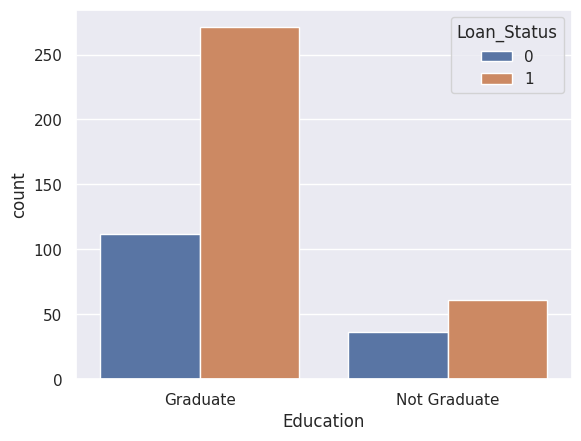

In [33]:
sns.set()
sns.countplot(x = 'Education' , hue = 'Loan_Status' , data = data)

<Axes: xlabel='Married', ylabel='count'>

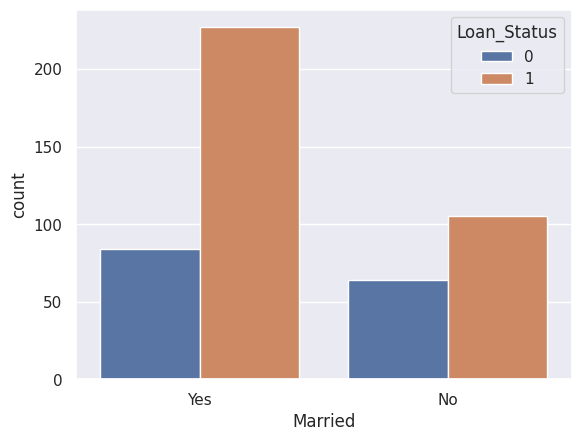

In [34]:
sns.countplot(x = 'Married' , hue = 'Loan_Status' , data = data)

In [35]:
data = data.replace({'Married': {'No':0 , 'Yes' : 1}})

/tmp/ipython-input-35-4271611424.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'Married': {'No':0 , 'Yes' : 1}})


In [36]:
data = data.replace({'Gender': {'Male':0 , 'Female' : 1}})

/tmp/ipython-input-36-3212804542.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'Gender': {'Male':0 , 'Female' : 1}})


In [37]:
data = data.replace({'Education': {'Graduate':0 , 'Not Graduate' : 1}})

/tmp/ipython-input-37-3607168463.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'Education': {'Graduate':0 , 'Not Graduate' : 1}})


In [38]:
data = data.replace({'Self_Employed': {'No':0 , 'Yes' : 1}})

/tmp/ipython-input-38-2498780620.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'Self_Employed': {'No':0 , 'Yes' : 1}})


In [39]:
data = data.replace({'Property_Area': {'Rural':0 , 'Semiurban' : 1 , 'Urban' : 2}})

/tmp/ipython-input-39-2235762708.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'Property_Area': {'Rural':0 , 'Semiurban' : 1 , 'Urban' : 2}})


In [40]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,0,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [41]:
X = data.drop(columns=['Loan_ID','Loan_Status'],axis = 1)
Y = data['Loan_Status']

In [42]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [44]:
model = svm.SVC(kernel='linear')
model.fit(X_train,Y_train)

predictiontrain = model.predict(X_train)
trainaccuracy  = accuracy_score(predictiontrain,Y_train)
print('Train Accuracy',trainaccuracy*100,'%')

predictiontest = model.predict(X_test)
testaccuracy  = accuracy_score(predictiontest,Y_test)
print('Test Accuracy',testaccuracy*100,'%')

Train Accuracy 77.77777777777779 %
Test Accuracy 83.33333333333334 %
